In [1]:
import os
import pickle
import torch

import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_path = "/projects/leelab/cl-explainability/results/imagenette2/simclr_x1"
methods = ["vanilla_grad", "int_grad", "random_baseline"]

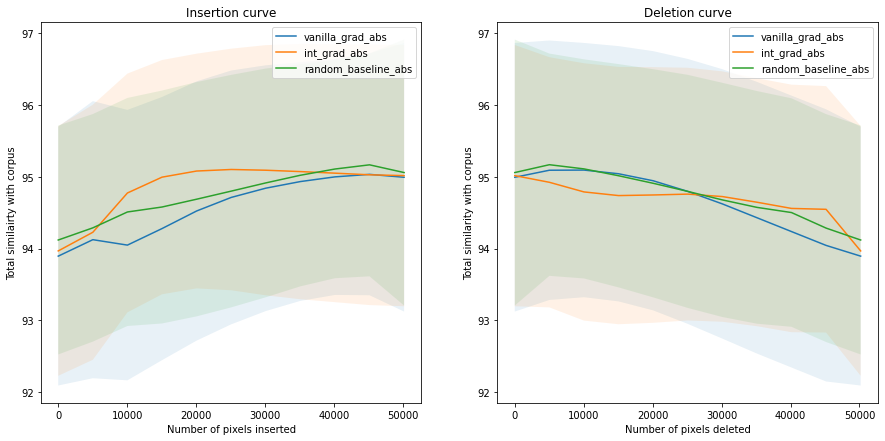

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

for method in methods:
    method_abs = method + "_abs"
    with open(
        os.path.join(
            result_path,
            method_abs,
            "123",
            "outputs_corpus_size=100_explicand_size=100_superpixel_dim=1_removal=blur.pkl",
        ),
        "rb",
    ) as handle:
        outputs = pickle.load(handle)

    insertion_curves_list = []
    deletion_curves_list = []
    insertion_num_features = None
    deletion_num_features = None

    for target, results in outputs.items():
        insertion_curves_list.append(results["insertion_curves"])
        deletion_curves_list.append(results["deletion_curves"])
        insertion_num_features = results["insertion_num_features"]
        deletion_num_features = results["deletion_num_features"]

    insertion_curves = torch.cat(insertion_curves_list)
    deletion_curves = torch.cat(deletion_curves_list)

    insertion_curve_mean = insertion_curves.mean(dim=0).cpu().numpy()
    insertion_curve_std = insertion_curves.std(dim=0).cpu().numpy()
    deletion_curve_mean = deletion_curves.mean(dim=0).cpu().numpy()
    deletion_curve_std = deletion_curves.std(dim=0).cpu().numpy()
    
    ax1.plot(
        insertion_num_features,
        insertion_curve_mean,
        label=method_abs,
    )
    ax1.fill_between(
        insertion_num_features,
        insertion_curve_mean - insertion_curve_std,
        insertion_curve_mean + insertion_curve_std,
        alpha=0.1,
    )
    ax1.set_title("Insertion curve")
    ax1.set_xlabel("Number of pixels inserted")
    ax1.set_ylabel("Total similairty with corpus")
    ax1.legend()
    
    ax2.plot(
        deletion_num_features,
        deletion_curve_mean,
        label=method_abs,
    )
    ax2.fill_between(
        deletion_num_features,
        deletion_curve_mean - deletion_curve_std,
        deletion_curve_mean + deletion_curve_std,
        alpha=0.1,
    )
    ax2.set_title("Deletion curve")
    ax2.set_xlabel("Number of pixels deleted")
    ax2.set_ylabel("Total similarity with corpus")
    ax2.legend()

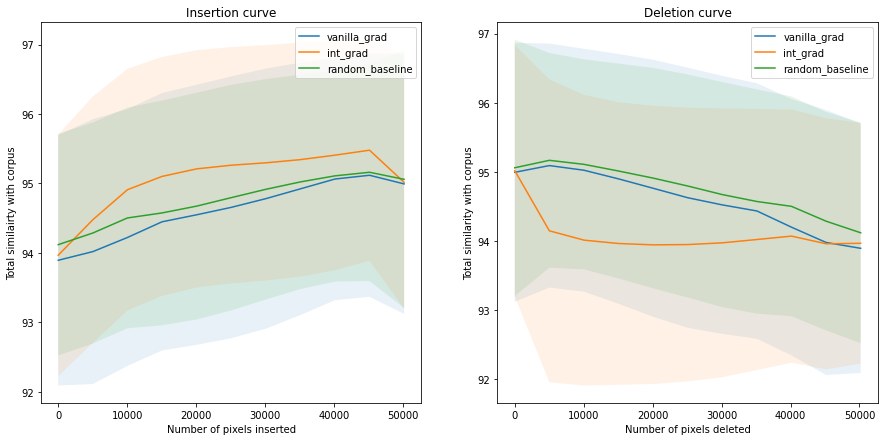

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

for method in methods:
    with open(
        os.path.join(
            result_path,
            method,
            "123",
            "outputs_corpus_size=100_explicand_size=100_superpixel_dim=1_removal=blur.pkl",
        ),
        "rb",
    ) as handle:
        outputs = pickle.load(handle)

    insertion_curves_list = []
    deletion_curves_list = []
    insertion_num_features = None
    deletion_num_features = None

    for target, results in outputs.items():
        insertion_curves_list.append(results["insertion_curves"])
        deletion_curves_list.append(results["deletion_curves"])
        insertion_num_features = results["insertion_num_features"]
        deletion_num_features = results["deletion_num_features"]

    insertion_curves = torch.cat(insertion_curves_list)
    deletion_curves = torch.cat(deletion_curves_list)

    insertion_curve_mean = insertion_curves.mean(dim=0).cpu().numpy()
    insertion_curve_std = insertion_curves.std(dim=0).cpu().numpy()
    deletion_curve_mean = deletion_curves.mean(dim=0).cpu().numpy()
    deletion_curve_std = deletion_curves.std(dim=0).cpu().numpy()
    
    ax1.plot(
        insertion_num_features,
        insertion_curve_mean,
        label=method,
    )
    ax1.fill_between(
        insertion_num_features,
        insertion_curve_mean - insertion_curve_std,
        insertion_curve_mean + insertion_curve_std,
        alpha=0.1,
    )
    ax1.set_title("Insertion curve")
    ax1.set_xlabel("Number of pixels inserted")
    ax1.set_ylabel("Total similairty with corpus")
    ax1.legend()
    
    ax2.plot(
        deletion_num_features,
        deletion_curve_mean,
        label=method,
    )
    ax2.fill_between(
        deletion_num_features,
        deletion_curve_mean - deletion_curve_std,
        deletion_curve_mean + deletion_curve_std,
        alpha=0.1,
    )
    ax2.set_title("Deletion curve")
    ax2.set_xlabel("Number of pixels deleted")
    ax2.set_ylabel("Total similarity with corpus")
    ax2.legend()